### Importing all the required libraries

In [13]:
import numpy as np  
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score, accuracy_score

### Reading and printing the data

In [14]:
df = pd.read_csv("E:\\sem3\\projectsem3\\dataset.csv")
df

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,86.0,1
4234,1,51,3.0,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,68.0,0
4235,0,48,2.0,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,86.0,0
4236,0,44,1.0,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,NaN,0


### Describing the data

In [15]:
df.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0


In [16]:
df.tail()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
4233,1,50,1.0,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,86.0,1
4234,1,51,3.0,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,68.0,0
4235,0,48,2.0,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,86.0,0
4236,0,44,1.0,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,NaN,0
4237,0,52,2.0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,107.0,0


In [17]:
df.describe()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,81.966753,0.151958
std,0.495022,8.572160,1.019791,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,87.000000,0.000000
max,1.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,394.000000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  glucose          3850 non-null   float64
 13  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 463.7 KB


### Cleaning and Preprocessing the data

In [19]:
df.isnull().sum()

male                 0
age                  0
education          105
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
glucose            388
TenYearCHD           0
dtype: int64

In [20]:
df = df.fillna(df.mean())

In [21]:
df.isnull().sum()

male               0
age                0
education          0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
glucose            0
TenYearCHD         0
dtype: int64

In [22]:
df.shape

(4238, 14)

In [23]:
Categorical_Col = []
Numerical_Col = []

In [24]:
for col in df.columns:
    if df[col].dtype == 'object':
        Categorical_Col.append(col)
    else:
        Numerical_Col.append(col)

In [25]:
Categorical_Col

[]

In [26]:
Numerical_Col

['male',
 'age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'glucose',
 'TenYearCHD']

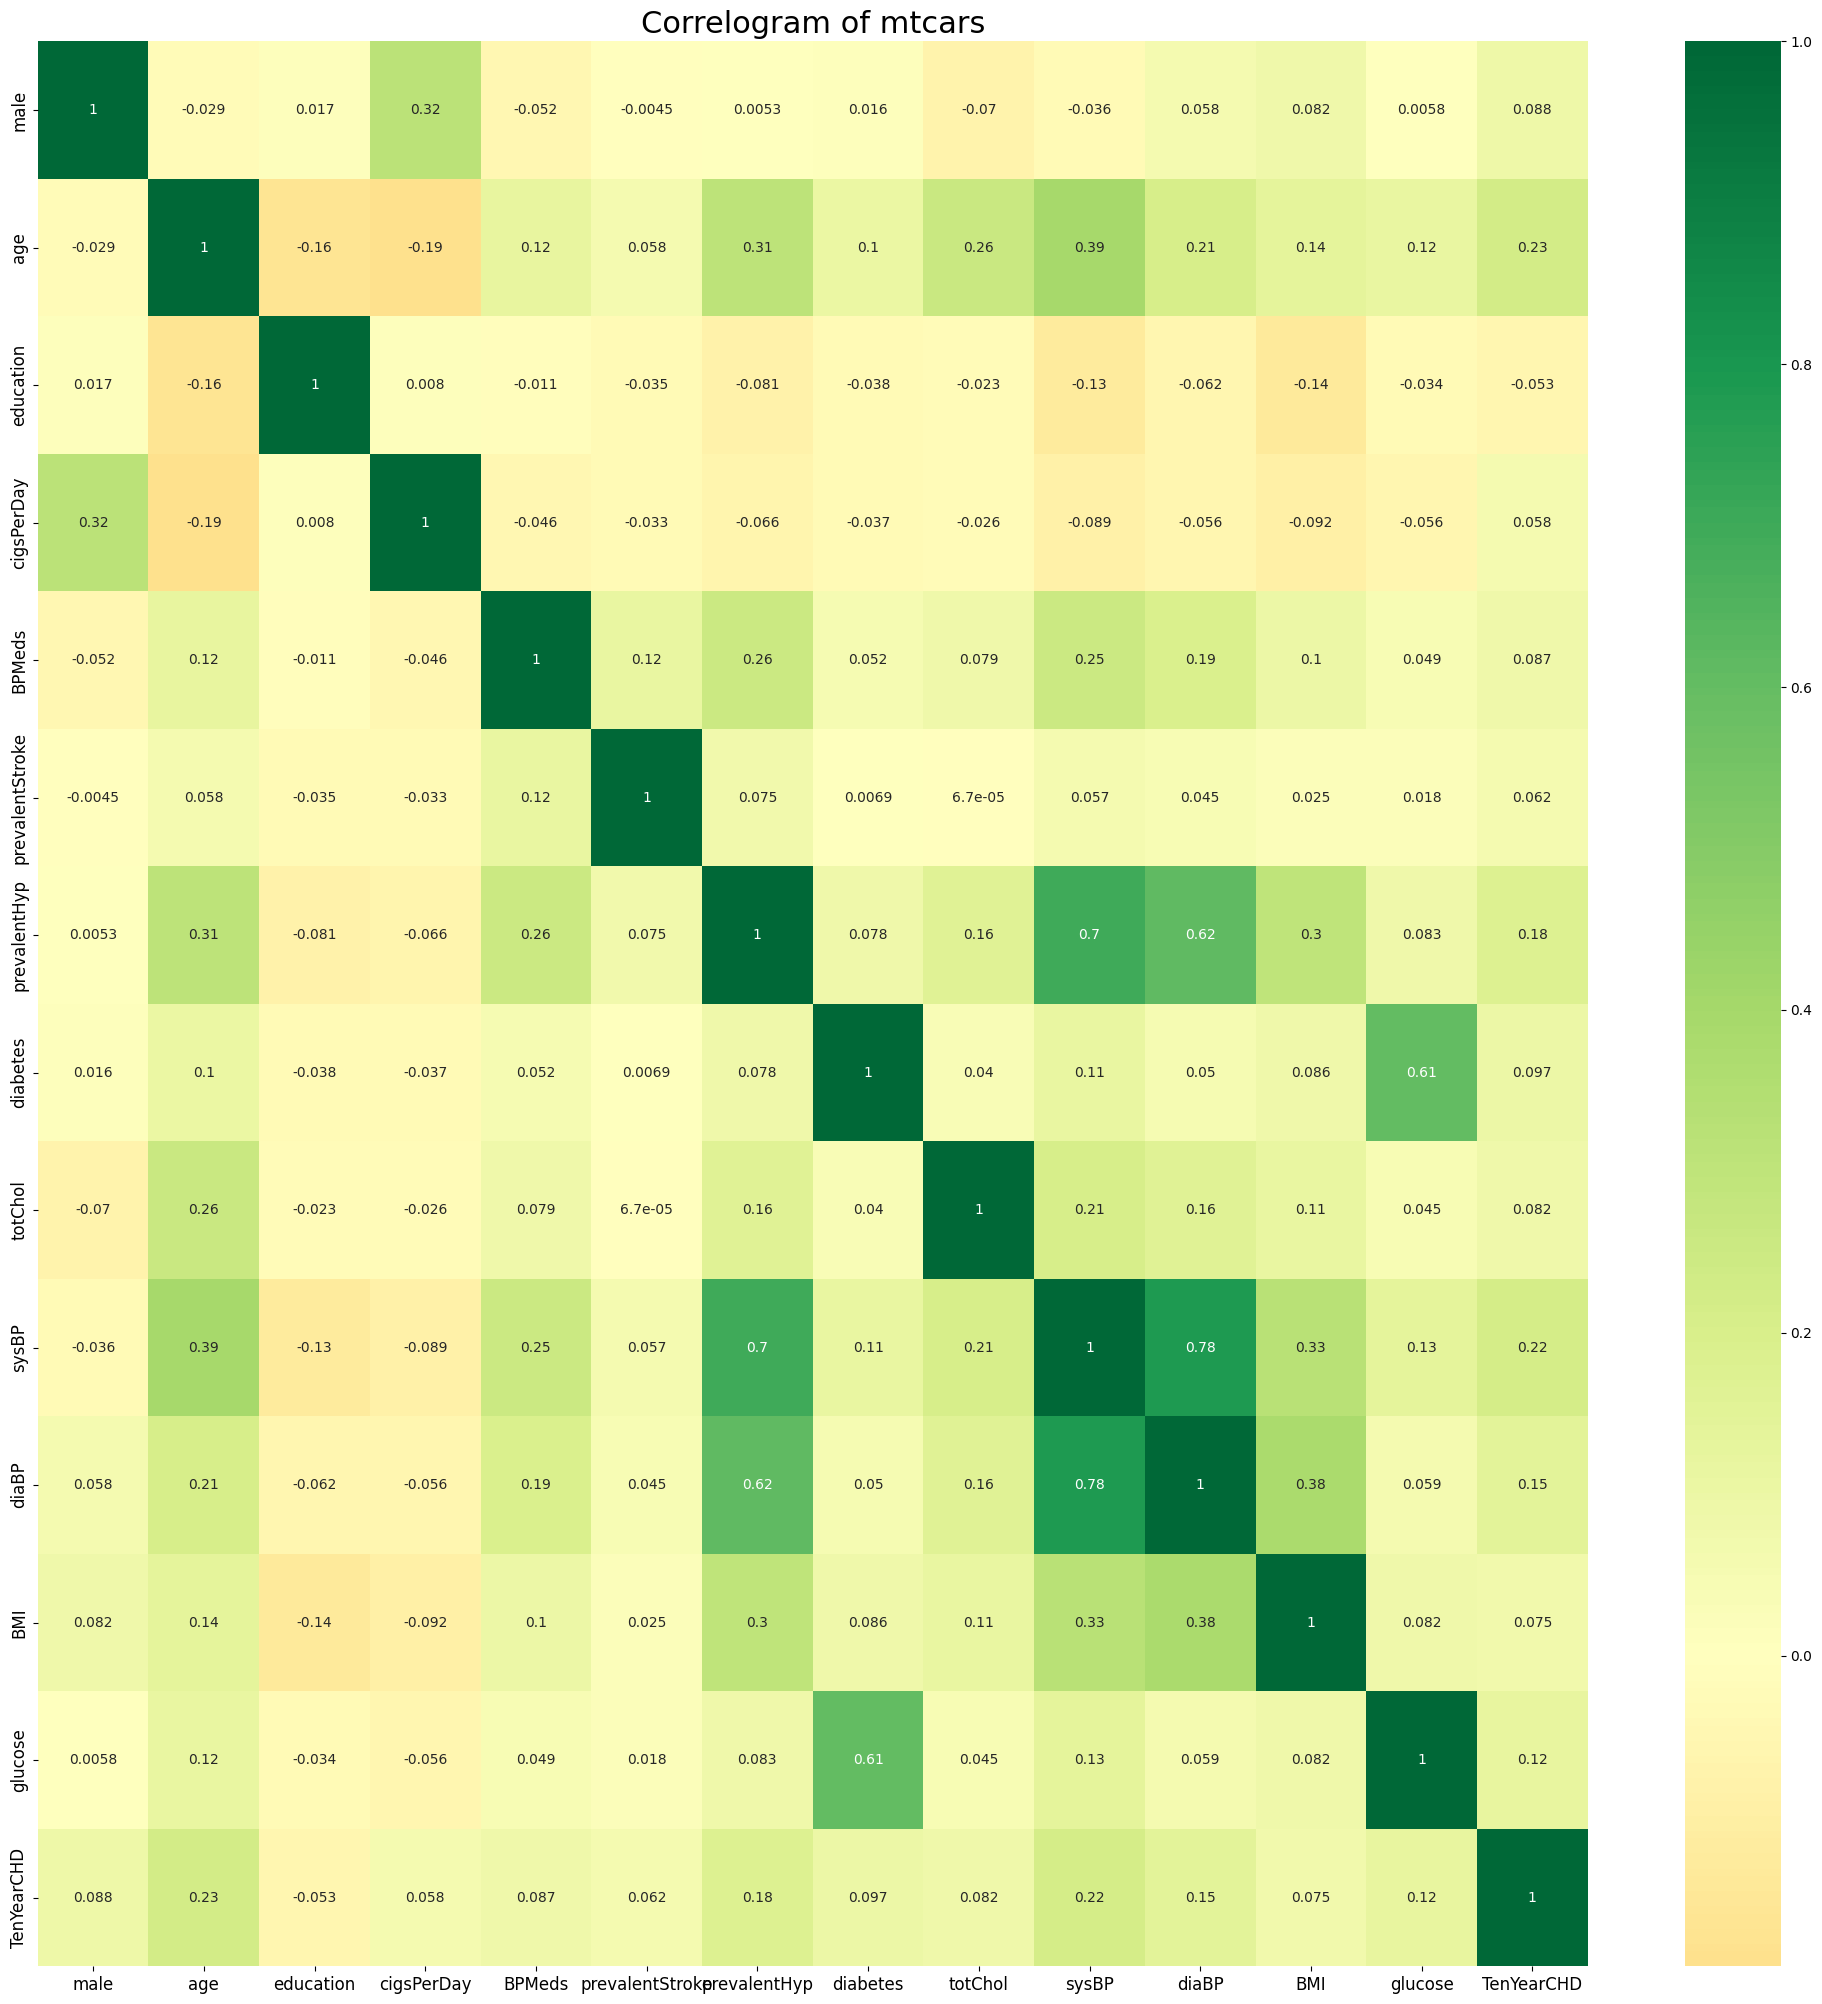

In [27]:
plt.figure(figsize=(25,25), dpi= 100)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [28]:
df = pd.DataFrame(df)
df.rename(columns={'male': 'Gender'}, inplace=True)
columns_to_drop = ['education']
df.drop(columns=columns_to_drop, inplace=True)
df

,Gender,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,1,39,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,77.000000,0
1,0,46,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,76.000000,0
2,1,48,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,70.000000,0
3,0,61,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,103.000000,1
4,0,46,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,86.000000,1
4234,1,51,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,68.000000,0
4235,0,48,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,86.000000,0
4236,0,44,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,81.966753,0


In [29]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [30]:

X = df.drop(columns=['Gender'])  
y = df['Gender']  
smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X, y)
df = pd.concat([X_resampled, y_resampled], axis=1)
df

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD,Gender
0,39,0.000000,0.0,0,0,0,195.000000,106.000000,70.000000,26.970000,77.000000,0,1
1,46,0.000000,0.0,0,0,0,250.000000,121.000000,81.000000,28.730000,76.000000,0,0
2,48,20.000000,0.0,0,0,0,245.000000,127.500000,80.000000,25.340000,70.000000,0,1
3,61,30.000000,0.0,0,1,0,225.000000,150.000000,95.000000,28.580000,103.000000,1,0
4,46,23.000000,0.0,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833,43,4.580894,0.0,0,0,0,221.508814,107.289661,69.491186,24.738661,82.474270,0,1
4834,46,24.981679,0.0,0,0,0,172.974350,117.472518,77.472518,20.229047,74.978015,0,1
4835,55,0.000000,0.0,0,0,0,260.410255,126.602564,76.512819,25.142051,70.000000,0,1
4836,44,20.000000,0.0,0,0,0,241.756335,127.731690,82.780284,25.687536,70.926761,0,1


In [31]:
X = df.drop(columns=['prevalentHyp'])  
y = df['prevalentHyp']  
smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X, y)
df = pd.concat([X_resampled, y_resampled], axis=1)
df

,age,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD,Gender,prevalentHyp
0,39,0.000000,0.000000,0,0,195.000000,106.000000,70.000000,26.970000,77.000000,0,1,0
1,46,0.000000,0.000000,0,0,250.000000,121.000000,81.000000,28.730000,76.000000,0,0,0
2,48,20.000000,0.000000,0,0,245.000000,127.500000,80.000000,25.340000,70.000000,0,1,0
3,61,30.000000,0.000000,0,0,225.000000,150.000000,95.000000,28.580000,103.000000,1,0,1
4,46,23.000000,0.000000,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,56,0.000000,0.000000,0,0,151.445434,99.120824,62.241648,24.988808,72.117436,0,0,1
6804,57,0.000000,0.000000,0,0,240.983360,143.491680,85.483360,24.014163,81.983670,0,0,1
6805,58,0.000000,0.000000,0,0,313.300748,157.300748,102.398503,24.773728,81.985585,0,0,1
6806,56,2.722124,0.000000,0,0,265.463127,149.536873,83.722124,28.725764,73.000000,0,0,1


In [32]:

X = df.drop(columns=['prevalentStroke'])  
y = df['prevalentStroke']  
smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X, y)
df = pd.concat([X_resampled, y_resampled], axis=1)
df

,age,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD,Gender,prevalentHyp,prevalentStroke
0,39,0.000000,0.000000,0,195.000000,106.000000,70.000000,26.970000,77.000000,0,1,0,0
1,46,0.000000,0.000000,0,250.000000,121.000000,81.000000,28.730000,76.000000,0,0,0,0
2,48,20.000000,0.000000,0,245.000000,127.500000,80.000000,25.340000,70.000000,0,1,0,0
3,61,30.000000,0.000000,0,225.000000,150.000000,95.000000,28.580000,103.000000,1,0,1,0
4,46,23.000000,0.000000,0,285.000000,130.000000,84.000000,23.100000,85.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13561,52,19.519662,0.024017,0,260.336236,158.024017,95.855899,21.343642,81.975983,0,0,1,1
13562,61,0.000000,0.019816,0,300.267628,145.987283,73.605201,21.771023,140.363007,0,0,0,1
13563,53,0.000000,0.118656,0,317.440329,148.457476,91.813443,24.450700,124.117969,0,0,0,1
13564,60,0.000000,1.000000,0,236.599542,191.851937,110.570387,41.609419,88.822782,0,0,1,1


In [33]:

X = df.drop(columns=['TenYearCHD'])  
y = df['TenYearCHD']   
smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X, y)
df = pd.concat([X_resampled, y_resampled], axis=1)
df

,age,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,glucose,Gender,prevalentHyp,prevalentStroke,TenYearCHD
0,39,0.000000,0.000000,0,195.000000,106.000000,70.000000,26.970000,77.000000,1,0,0,0
1,46,0.000000,0.000000,0,250.000000,121.000000,81.000000,28.730000,76.000000,0,0,0,0
2,48,20.000000,0.000000,0,245.000000,127.500000,80.000000,25.340000,70.000000,1,0,0,0
3,61,30.000000,0.000000,0,225.000000,150.000000,95.000000,28.580000,103.000000,0,1,0,1
4,46,23.000000,0.000000,0,285.000000,130.000000,84.000000,23.100000,85.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22853,60,16.097520,0.000000,0,210.853636,157.731652,94.000000,26.607478,68.609752,1,0,1,1
22854,60,16.897512,0.000000,0,211.345339,162.172670,97.309321,26.293854,71.895656,0,1,1,1
22855,56,20.000000,0.990117,0,261.970350,139.950584,92.970350,21.987349,81.957199,0,1,0,1
22856,52,1.017586,0.000000,0,202.610552,140.680895,97.256275,29.573845,70.256275,0,0,1,1


In [34]:
df=df.sample(frac=1)
df

,age,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,glucose,Gender,prevalentHyp,prevalentStroke,TenYearCHD
20181,50,0.000000,0.720752,0,213.045266,184.954734,118.828341,36.943276,88.883009,0,1,0,1
13497,62,4.321494,0.000000,0,264.703552,143.889345,99.135701,27.590348,78.080374,1,1,1,0
15573,56,10.818999,0.000000,0,208.103466,160.551733,103.793068,27.257498,77.568935,0,1,1,1
3630,47,20.000000,0.000000,0,236.721585,120.000000,77.500000,23.390000,81.966753,0,0,0,0
20848,52,0.959377,0.003158,0,302.253818,127.040623,90.893403,26.944930,76.147220,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,62,29.127098,0.000000,0,225.912710,107.222063,68.154676,24.047772,87.611031,1,0,0,0
6246,61,20.000000,0.000000,0,265.926865,180.000000,100.658541,24.809264,83.305729,0,1,0,1
8766,60,0.000000,0.018184,0,301.974919,146.317726,75.202343,21.831054,139.591972,0,0,1,0
3787,49,0.000000,0.000000,0,203.000000,125.000000,70.000000,22.520000,81.966753,0,0,0,0


In [35]:
duplicates=df[df.duplicated()]
duplicates

,age,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,glucose,Gender,prevalentHyp,prevalentStroke,TenYearCHD


In [36]:
def condition_ratio(data):
    results = data['TenYearCHD'].value_counts()
    values = [results[0], results[1]]
    labels = ['Low probability', 'High probability']
    colors = ['MediumSeaGreen', 'Coral']
    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors, 
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py
condition_ratio(df)

<module 'plotly.offline' from 'C:\\Users\\ishaa\\AppData\\Roaming\\Python\\Python310\\site-packages\\plotly\\offline\\__init__.py'>

In [37]:
df['TenYearCHD'].value_counts()

TenYearCHD
1    11429
0    11429
Name: count, dtype: int64

### Training and Testing different model architectures

In [38]:
X = df.iloc[:,0:12].values

In [39]:
y = df.iloc[:, 12].values

### Random Forest Classifier

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=128)
scorer = make_scorer(f1_score)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
new_threshold = 0.3
rf_probabilities = best_rf_model.predict_proba(X_test)[:, 1]
rf_predictions = (rf_probabilities > new_threshold).astype(int)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Best Parameters:", grid_search.best_params_)
print(f"F1 Score: {grid_search.best_score_:.4f}")
print(f"Accuracy: {rf_accuracy * 100:.2f}%")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
F1 Score: 0.9527
Accuracy: 93.53%


In [91]:
conf_matrix = confusion_matrix(y_test, rf_predictions)
print("Best Parameters:", grid_search.best_params_)
print("Confusion Matrix \n",conf_matrix)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Confusion Matrix 
 [[1024  126]
 [  22 1114]]


In [92]:
rf_classification_report = classification_report(y_test, rf_predictions)
print("Classification Report:\n", rf_classification_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      1150
           1       0.90      0.98      0.94      1136

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286



### Logistic Regression Model

In [93]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr_model = LogisticRegression(random_state=0,)
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_lr_model = grid_search.best_estimator_
X_test = scaler.transform(X_test)
lr_predictions = best_lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Accuracy: {lr_accuracy * 100:.2f}%")

Accuracy: 50.31%


In [94]:
conf_matrix=confusion_matrix(y_test,lr_predictions)
print("Best Parameters:", grid_search.best_params_)
print("Confusion Matrix \n",conf_matrix)

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Confusion Matrix 
 [[1150    0]
 [1136    0]]


In [95]:
lr_classification_report = classification_report(y_test, lr_predictions,zero_division=0)
print("Classification Report:\n", lr_classification_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      1150
           1       0.00      0.00      0.00      1136

    accuracy                           0.50      2286
   macro avg       0.25      0.50      0.33      2286
weighted avg       0.25      0.50      0.34      2286



### Xgboost

In [96]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
xgb_model = xgb.XGBClassifier(random_state=0, n_jobs=-1)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_
X_test = scaler.transform(X_test)
xgb_predictions = best_xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"Accuracy: {xgb_accuracy * 100:.2f}%")

Accuracy: 50.31%


In [97]:
conf_matrix=confusion_matrix(y_test,xgb_predictions)
print("Best Parameters:", grid_search.best_params_)
print("Confusion Matrix \n",conf_matrix)

Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Confusion Matrix 
 [[1150    0]
 [1136    0]]


In [98]:
xgb_classification_report = classification_report(y_test, xgb_predictions,zero_division=1)
print("Classification Report:\n", xgb_classification_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      1150
           1       1.00      0.00      0.00      1136

    accuracy                           0.50      2286
   macro avg       0.75      0.50      0.33      2286
weighted avg       0.75      0.50      0.34      2286



### Neural Network Model

In [99]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Input(shape=(12,)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

initial_learning_rate = 0.014
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=40, decay_rate=0.007, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/100
161/161 [==============================] - 1s 3ms/step - loss: 0.3134 - accuracy: 0.7450 - val_loss: 0.6151 - val_accuracy: 0.5105
Epoch 2/100
161/161 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.7558 - val_loss: 0.6155 - val_accuracy: 0.5105
Epoch 3/100
161/161 [==============================] - 0s 2ms/step - loss: 0.2922 - accuracy: 0.7587 - val_loss: 0.6155 - val_accuracy: 0.5105
Epoch 4/100
161/161 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.7572 - val_loss: 0.6155 - val_accuracy: 0.5105
Epoch 5/100
161/161 [==============================] - 0s 2ms/step - loss: 0.2925 - accuracy: 0.7569 - val_loss: 0.6155 - val_accuracy: 0.5105
Epoch 6/100
161/161 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.7617 - val_loss: 0.6155 - val_accuracy: 0.5105
Epoch 7/100
161/161 [==============================] - 0s 2ms/step - loss: 0.2913 - accuracy: 0.7575 - val_loss: 0.6155 - val_accuracy: 0.5105

In [100]:
y_pred = model.predict(X_test)

# Assuming y_pred contains probabilities, you can convert them to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Generate a classification report
report = classification_report(y_test, y_pred_binary,zero_division=0)

print(report)

72/72 [==============================] - 0s 794us/step
              precision    recall  f1-score   support

           0       0.51      0.99      0.67      1150
           1       0.74      0.02      0.04      1136

    accuracy                           0.51      2286
   macro avg       0.62      0.51      0.36      2286
weighted avg       0.62      0.51      0.36      2286



NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [44]:
import joblib
model_file_name="E:\sem3\projectsem3\heartprediction(Acc=93.53).pkl"
loaded_model=joblib.load(model_file_name)

In [45]:
def predict_heart_disease_risk(age, gender, cigsperday, bpmeds, prevalentstroke, prevalenthyp, diabetes, totcholesterol, sysbp, diabp, bmi, glucose):
    input_data = np.array([[age, gender, cigsperday, bpmeds, prevalentstroke, prevalenthyp, diabetes, totcholesterol, sysbp, diabp, bmi, glucose]])
    input_data = scaler.transform(input_data)  # Scale the input data
    probabilities = loaded_model.predict_proba(input_data)
    likelihood_of_heart_disease = (((probabilities[0][0]*100)-70)/(89-(probabilities[0][0]*100)))*100
    return likelihood_of_heart_disease

age =20
gender = 1
cigsperday = 0
bpmeds = 0
prevalentstroke = 0
prevalenthyp = 1
diabetes = 0
totcholesterol = 120
sysbp = 179
diabp = 70
bmi = 26.52
glucose = 100

heart_disease_likelihood = predict_heart_disease_risk(age, gender, cigsperday, bpmeds, prevalentstroke, prevalenthyp, diabetes, totcholesterol, sysbp, diabp, bmi, glucose)

print(f"Likelihood of Heart Disease: {heart_disease_likelihood:.2f}%")

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [6]:
import numpy as np

def predict_heart_disease_risk(age, gender, cigsperday, bpmeds, prevalentstroke, prevalenthyp, diabetes, totcholesterol, sysbp, diabp, bmi, glucose):
    input_data = np.array([[age, gender, cigsperday, bpmeds, prevalentstroke, prevalenthyp, diabetes, totcholesterol, sysbp, diabp, bmi, glucose]])
    input_data = scaler.transform(input_data)  
    probabilities = loaded_model.predict_proba(input_data)
    likelihood_of_heart_disease = probabilities[0][0] * 100 
    return likelihood_of_heart_disease

age = float(input("Enter age: "))
gender = int(input("Enter gender (0 for female, 1 for male): "))
cigsperday = int(input("Enter number of cigarettes per day: "))
bpmeds = int(input("Are you on blood pressure medication? (0 for No, 1 for Yes): "))
prevalentstroke = int(input("Have you had a stroke before? (0 for No, 1 for Yes): "))
prevalenthyp = int(input("Do you have prevalent hypertension? (0 for No, 1 for Yes): "))
diabetes = int(input("Do you have diabetes? (0 for No, 1 for Yes): "))
totcholesterol = float(input("Enter total cholesterol level: "))
sysbp = float(input("Enter systolic blood pressure: "))
diabp = float(input("Enter diastolic blood pressure: "))
bmi = float(input("Enter BMI (Body Mass Index): "))
glucose = float(input("Enter fasting blood glucose level: "))

heart_disease_likelihood = predict_heart_disease_risk(age, gender, cigsperday, bpmeds, prevalentstroke, prevalenthyp, diabetes, totcholesterol, sysbp, diabp, bmi, glucose)

print(f"Likelihood of Heart Disease: {heart_disease_likelihood:.2f}%")


ValueError: could not convert string to float: ''